# In this notebook,  I explore the json file inside the timeseries folder of the github link provided in the paper for the purpose of the take home assignment

## As a first step, I loaded a sample json file from the timeseries folder to read the contents. 

#### Here, I have chosen "apache__arrow#org.apache.arrow.adapter.jdbc.JdbcAdapterBenchmarks.consumeBenchmark#" json file and i have renamed it to apache.json for ease of use

In [3]:
import json

# Load one of the JSON benchmark files
with open('apache.json') as f:
    data = json.load(f)

# Print the data
print(json.dumps(data, indent=3))

[
   [
      0.0016664234666666665,
      0.0009075868828828831,
      0.0009066274594594598,
      0.0009451230188679249,
      0.0010355384742268042,
      0.0008166524878048779,
      0.0007697959384615387,
      0.0008033976319999999,
      0.0008054374399999999,
      0.0006784968648648648,
      0.0006804654149659864,
      0.0006234951552795033,
      0.0006223821118012422,
      0.0007019985454545455,
      0.0008008581120000001,
      0.0006311232,
      0.0006248180869565217,
      0.0006246336397515528,
      0.0006714828456375839,
      0.0006224584347826086,
      0.0006216188819875776,
      0.0006214471552795031,
      0.0006207336296296296,
      0.0008042004479999999,
      0.0008720651130434784,
      0.0008965394285714285,
      0.0008973257142857144,
      0.0008957440000000001,
      0.0008951588571428571,
      0.0007381910588235294,
      0.0006224266335403725,
      0.0006247735652173914,
      0.000623584198757764,
      0.0006225411180124223,
      0.000622572

## As a next step, I wanted to plot the data from apache.json. Hence, in the next block of code,  I have used matplotlib for the same

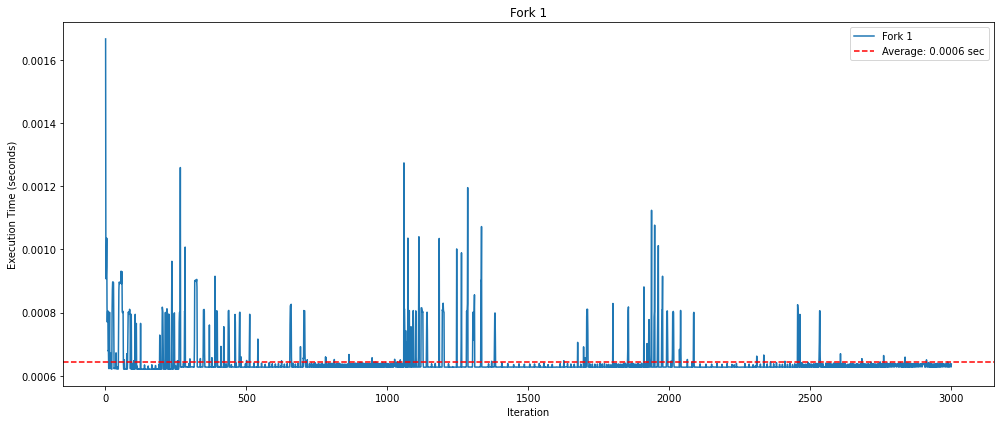

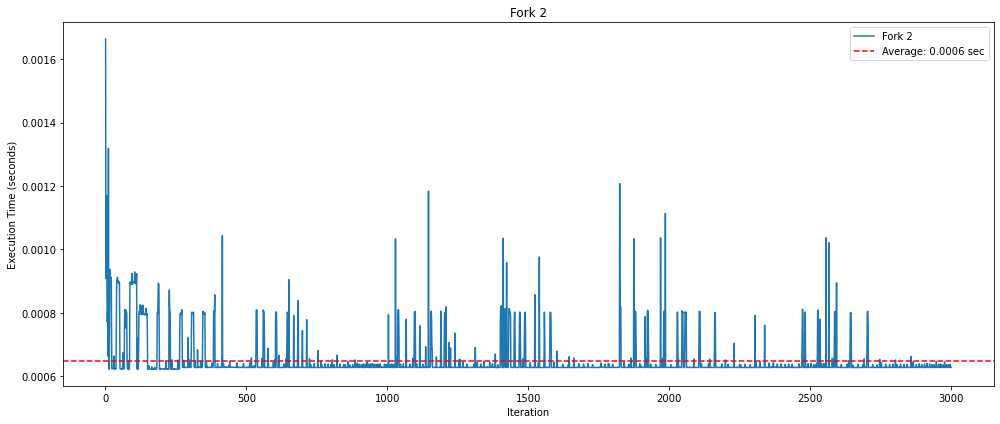

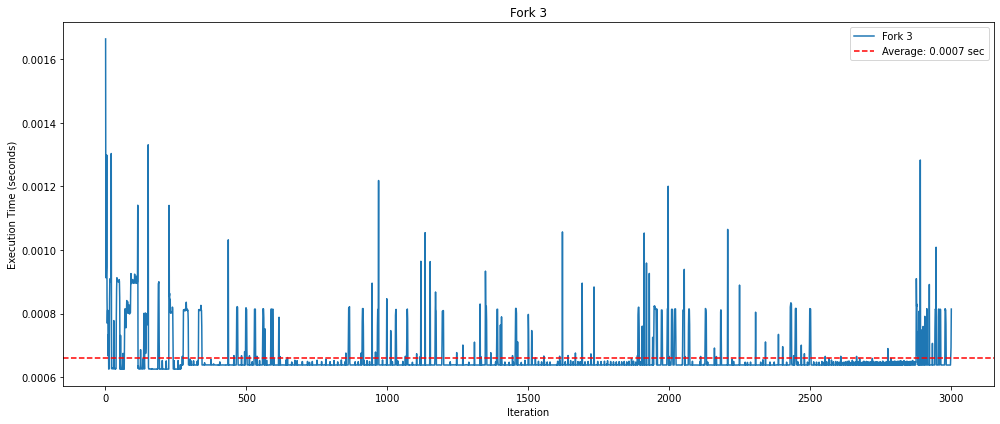

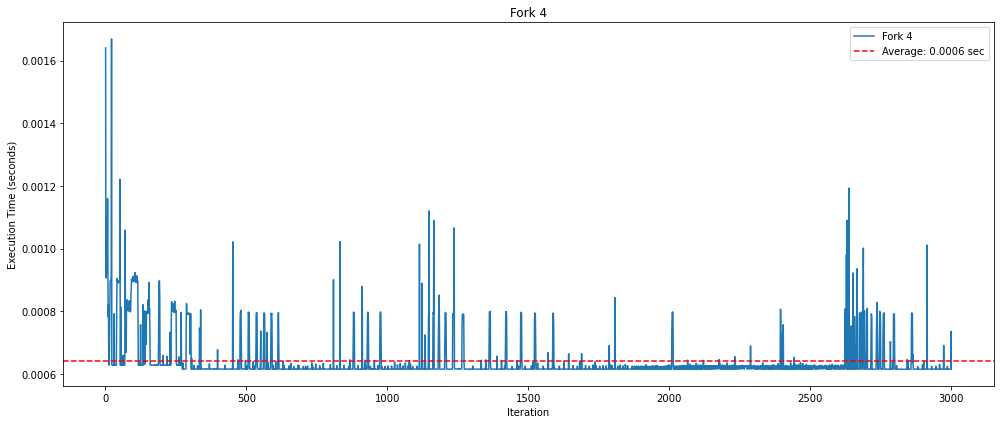

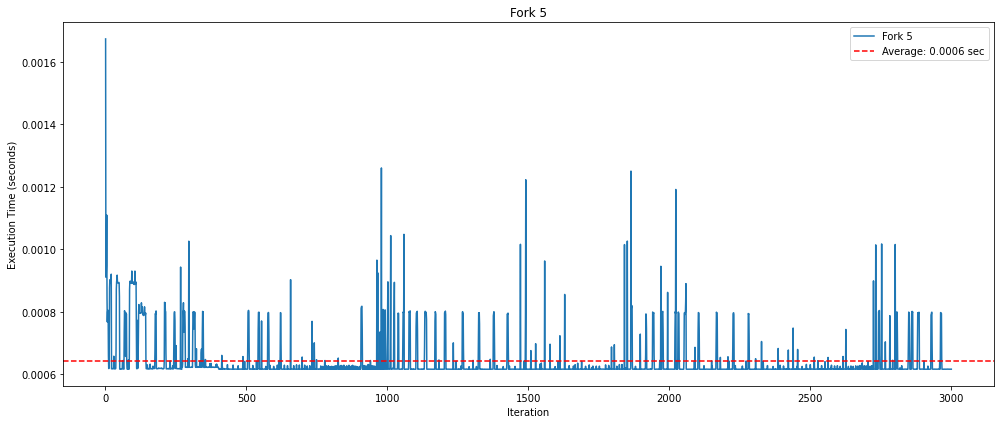

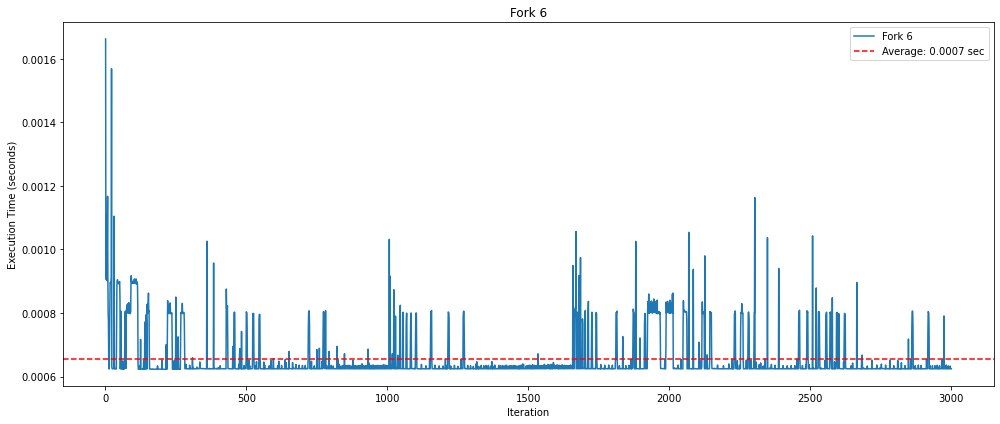

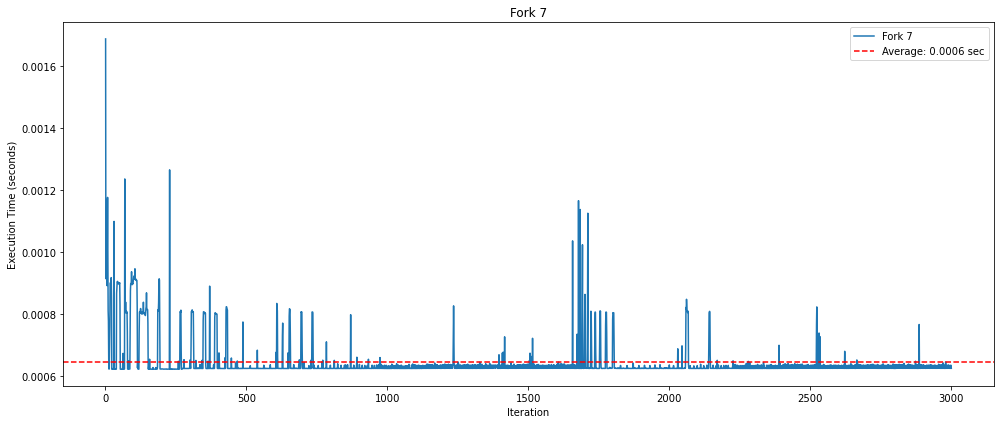

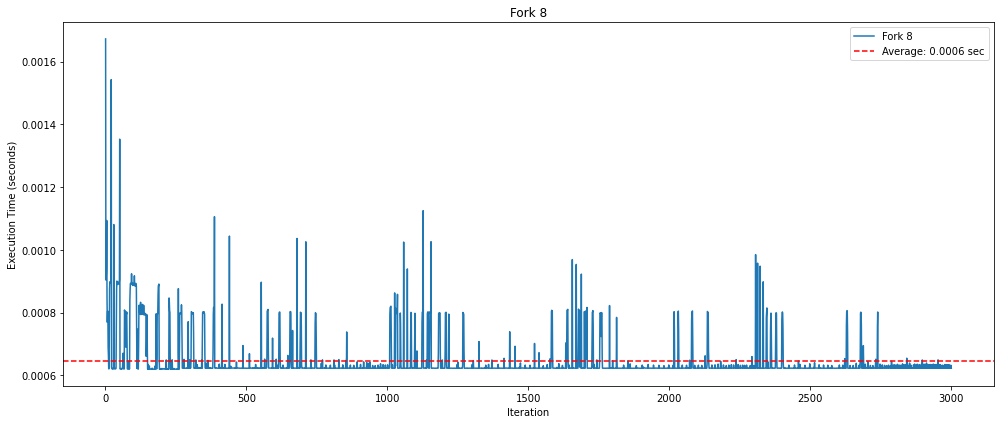

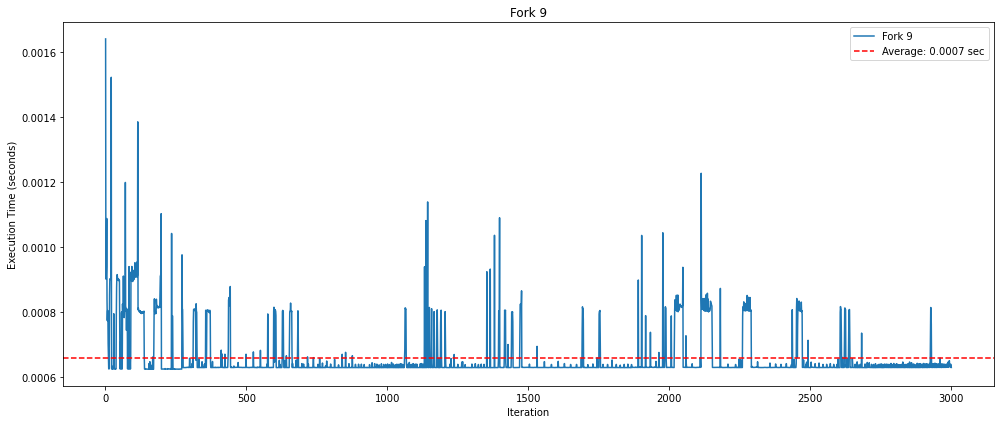

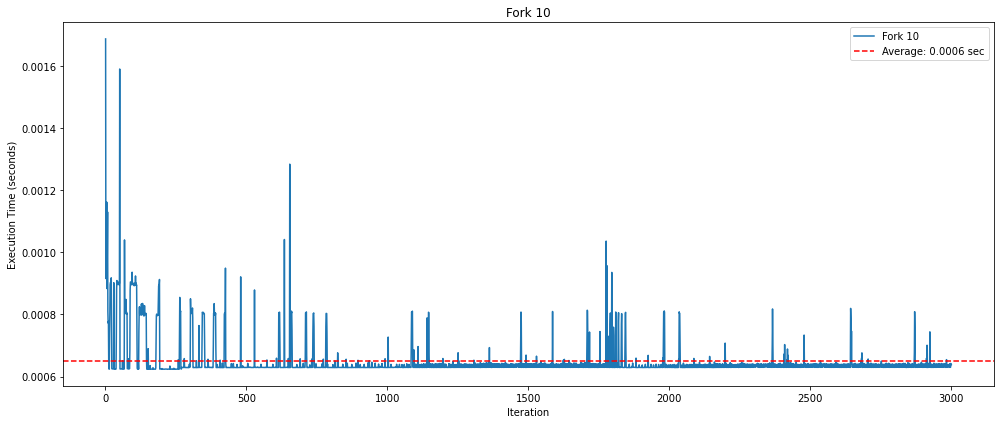

In [46]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('apache.json') as f:
    data = json.load(f)

# Plot each fork's data
def plot_benchmark(data):
    # Iterate over the forks in the data
    for fork_index, fork_data in enumerate(data):
        plt.figure(figsize=(14, 6))
        iterations = list(range(1, len(fork_data) + 1))  # Create a list of iteration numbers
        plt.plot(iterations, fork_data, label=f'Fork {fork_index + 1}')
        
        avg = sum(fork_data) / len(fork_data)
        plt.axhline(y=avg, color='red', linestyle='--', label=f'Average: {avg:.4f} sec')
        # Add labels and title
        plt.xlabel('Iteration')
        plt.ylabel('Execution Time (seconds)')
        plt.title(f'Fork {fork_index + 1}')
        plt.legend(loc='upper right')
        # Show the plot
        plt.tight_layout()
        plt.show()
# Call the function to plot the data
plot_benchmark(data)


## In the next code block, I calculate the following basic descriptive statistics:

#### 1. Mean - Average of the execution time inside each fork
#### 2. Standard deviation
#### 3. Mode - Frequently occuring value and its count
#### 4. Median - The mid value 
#### 5. Kurtosis - Degree of tailedness (outliers)

In [14]:
import numpy as np
from scipy.stats import kurtosis
from scipy import stats

def calculate_stats(data):
    for fork_index, fork_data in enumerate(data):
        avg = np.mean(fork_data) #calculate average execution time for each fork
        stdev = np.std(fork_data) #calculate standard deviation for each fork
        kurt = kurtosis(fork_data) #value greater than 3 indicates high variance
        median = np.median(fork_data)
        mode_obj = stats.mode(fork_data)
        mode_val = mode_obj.mode[0]
        mode_freq = mode_obj.count[0]
        print(f'Fork {fork_index + 1} - Mean : {avg:.6f} seconds, Median : {median:.6f} seconds, Mode : {mode_val:.6f} seconds, occurence : {mode_freq}, Stdev : {stdev:.6f} seconds, Kurtosis : {kurt}')

# Call the function to calculate basic descriptive statistics
calculate_stats(data)

Fork 1 - Mean : 0.000644 seconds, Median : 0.000627 seconds, Mode : 0.000627 seconds, occurence : 48, Stdev : 0.000059 seconds, Kurtosis : 51.614375801115486
Fork 2 - Mean : 0.000649 seconds, Median : 0.000628 seconds, Mode : 0.000627 seconds, occurence : 42, Stdev : 0.000067 seconds, Kurtosis : 31.777541973572276
Fork 3 - Mean : 0.000662 seconds, Median : 0.000639 seconds, Mode : 0.000638 seconds, occurence : 47, Stdev : 0.000070 seconds, Kurtosis : 30.360739608182747
Fork 4 - Mean : 0.000641 seconds, Median : 0.000616 seconds, Mode : 0.000616 seconds, occurence : 26, Stdev : 0.000072 seconds, Kurtosis : 36.749129223047305
Fork 5 - Mean : 0.000641 seconds, Median : 0.000617 seconds, Mode : 0.000617 seconds, occurence : 33, Stdev : 0.000071 seconds, Kurtosis : 27.49948077962268
Fork 6 - Mean : 0.000654 seconds, Median : 0.000625 seconds, Mode : 0.000625 seconds, occurence : 25, Stdev : 0.000075 seconds, Kurtosis : 23.905194102466236
Fork 7 - Mean : 0.000645 seconds, Median : 0.000625 s

## I calculated the number of values above and below average in each fork and plotted them in a bar chart

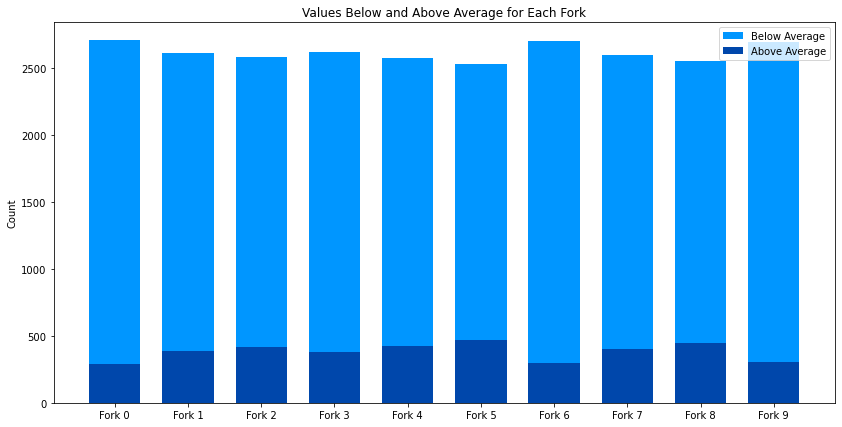

In [42]:
outliers_list = []
below_list = []
above_list = []

# Iterate over the forks and calculate statistics
for fork_index, fork_data in enumerate(data):
    avg = np.mean(fork_data)
    stdev = np.std(fork_data)

    # Calculate values below, above the average
    below = len([x for x in fork_data if x < avg])
    above = len([x for x in fork_data if x > avg])
    
    below_list.append(below)
    above_list.append(above)

# Plotting the bar chart
forks = [f"Fork {i}" for i in range(len(data))]  # Label forks

# Create the bar chart
bar_width = 0.7
indices = np.arange(len(forks))
plt.figure(figsize=(14, 7))

plt.bar(indices, below_list, bar_width, label='Below Average', color='#0096FF')
plt.bar(indices, above_list, bar_width, label='Above Average', color='#0047AB')

# Add labels and titles

plt.ylabel('Count')
plt.title('Values Below and Above Average for Each Fork')
plt.xticks(indices, forks)  # Align labels with bars
plt.legend()

# Display the chart
plt.show()